In [1]:
#det her er den udgave med det cleanede data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle("data/labeled_content_new.pkl")

In [3]:
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake":
        return 1

y = data["type"].apply(lambda x:bin_target(x)).astype(int)
X = data["content"]
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True) 

In [4]:
def fun(doc):
   return doc

vectorizer = TfidfVectorizer(
    tokenizer=fun,
    preprocessor=fun,
    token_pattern=None)  

In [5]:
X_train = vectorizer.fit_transform(X_train)
print(X_train.shape)

(336608, 827974)


In [6]:
X_val = vectorizer.transform(X_val)
print(X_val.shape)

(42076, 827974)


In [7]:
X_test = vectorizer.transform(X_test)
print(X_test.shape)

(42077, 827974)


In [8]:
#first try
clf1 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2).fit(X_train, y_train)
y_pred = clf1.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

accuracy: 0.9459549386823842
F1: 0.9440011820330969


c:\Users\emilo\miniconda3\envs\ds_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
clf2 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2, activation="tanh").fit(X_train, y_train)
y_pred = clf2.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

In [ ]:
#try with different activation function
clf3 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2, activation="logistic").fit(X_train, y_train)
y_pred = clf3.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.26011617


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9504705770510504
F1: 0.9482518871672626


In [ ]:
#try with more layers
clf4 = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20,20,20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2,activation="tanh").fit(X_train, y_train)
y_pred = clf4.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


accuracy: 0.947998859207149
F1: 0.9461508170899784


In [ ]:
#try with less neurons
clf5 = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1,verbose=True,activation="tanh").fit(X_train, y_train)
y_pred = clf5.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))

Iteration 1, loss = 0.16668640


c:\Users\astri\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#validation
clf = clf5
y_pred = clf.predict(X_val)
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Precision:", precision)
print("Recall:", recall)

accuracy: 0.9589314573628672
F1: 0.9572171329537014
Precision: 0.959974176888315
Recall: 0.954475880116526


In [ ]:
def evaluate(model, name,test_vec):
    print(f"evaluating {name}")
    y_pred = model.predict(test_vec)
    print("accuracy:", accuracy_score(y_pred,y_test))
    print("F1:", f1_score(y_pred,y_test))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
    plt.xlabel('Predicted', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.title(f'Confusion Matrix, {name}', fontsize=10)
    plt.show()

evaluating advanced model
accuracy: 0.9584571143379994
F1: 0.9565109220281635
Precision: 0.9584662943757479
Recall: 0.9545635117687953


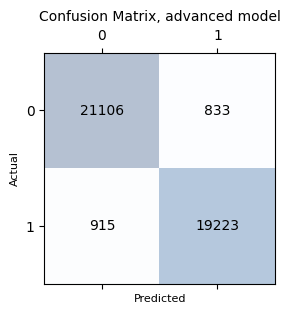

In [ ]:
evaluate(clf5, "advanced model", X_test)

In [ ]:
liar = pd.read_pickle("labeled_liar_statements_preprocessed.pkl")

In [ ]:
print(liar["Label"].head(20))

0           false
1       half-true
2     mostly-true
3           false
4       half-true
5            true
6     barely-true
7       half-true
8       half-true
9     mostly-true
10    mostly-true
11      half-true
12          false
13    mostly-true
14    barely-true
15      half-true
16           true
17    barely-true
18      half-true
19    mostly-true
Name: Label, dtype: object


In [ ]:
true = set(["half-true","mostly-true","barely-true","true"])
false = set(["false","pants-fire"])

def get_bin_y_liar(x):
    if x in true:
        return 0
    elif x in false:
        return 1
    
liar["Label_bin"] = liar["Label"].apply(lambda x: get_bin_y_liar(x))
print(len(liar))

12791


In [ ]:
liar["Label_bin"].value_counts()

Label_bin
0    9237
1    3554
Name: count, dtype: int64

In [ ]:
y_test_liar = liar["Label_bin"]
X_test_liar = liar["Statement"]

In [ ]:
print(len(y_test_liar[y_test_liar==1])/len(y_test_liar))

0.2778516144163865


In [ ]:
X_test_liar = vectorizer.transform(X_test_liar)
print(X_test.shape)

(42077, 827974)


evaluating advanced model
accuracy: 0.39074349151747323
F1: 0.4222699977759656
Precision: 0.2866633115249119
Recall: 0.8013505908835116


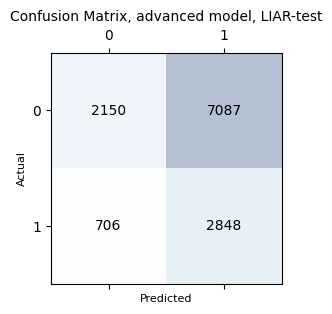

In [ ]:
def evaluate(model, name,test_vec,y_test):
    print(f"evaluating {name}")
    y_pred = model.predict(test_vec)
    print("accuracy:", accuracy_score(y_pred,y_test))
    print("F1:", f1_score(y_pred,y_test))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
    plt.xlabel('Predicted', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.title(f'Confusion Matrix, {name}, LIAR-test', fontsize=10)
    plt.show()

evaluate(clf5, "advanced model", X_test_liar,y_test_liar)